In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
#loading the dataset
data=pd.read_csv("C:/Users/DEEPIKA/Downloads/archive (1)/Titanic-Dataset.csv")

In [11]:
#loading the top five records
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#loading the bottom five records
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#displaying the size of dataset
data.size

10692

In [6]:
#checking whether dataset is having null values
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.shape

(891, 12)

In [101]:
data=np.ones(5)
print(data)

[1. 1. 1. 1. 1.]


In [102]:
x=np.zeros((3,6))
print(x)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
data.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [24]:
X=data.iloc[6:,2:10]
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000
...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [25]:
Y=data.iloc[-5:,4]
Y

886      male
887    female
888    female
889      male
890      male
Name: Sex, dtype: object

In [27]:
#data preprocessing for titatic dataset
data = data.drop(['Name','Cabin','Ticket','PassengerId'], axis=1)

In [28]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

In [29]:
data = pd.get_dummies(data,columns=['Embarked'],drop_first=True)

In [30]:
data=data.drop(['Age'],axis=1)

In [31]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,1,0,7.2500,False,True
1,1,1,1,1,0,71.2833,False,False
2,1,3,1,0,0,7.9250,False,True
3,1,1,1,1,0,53.1000,False,True
4,0,3,0,0,0,8.0500,False,True


In [32]:
data.tail()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
886,0,2,0,0,0,13.00,False,True
887,1,1,1,0,0,30.00,False,True
888,0,3,1,1,2,23.45,False,True
889,1,1,0,0,0,30.00,False,False
890,0,3,0,0,0,7.75,True,False


In [33]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,1,0,7.2500,False,True
1,1,1,1,1,0,71.2833,False,False
2,1,3,1,0,0,7.9250,False,True
3,1,1,1,1,0,53.1000,False,True
4,0,3,0,0,0,8.0500,False,True


In [34]:
X=data.drop('Survived',axis=1)

In [35]:
Y=data['Survived']

In [36]:
#spiliting the data into training set and testing set

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model=LogisticRegression(random_state=0)

In [40]:
model.fit(X_train,Y_train)

C:\Users\DEEPIKA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(891, 7)
(712, 7)
(179, 7)


In [42]:
Y_pred_data=model.predict(X_train)

In [43]:
Y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [44]:
pred=print(model.predict(X_test))

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [45]:
#using  random forest classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfm=RandomForestClassifier(n_estimators=150,random_state=52)

In [48]:
rfm.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=150, random_state=52)

In [49]:
y_pred_rf = rfm.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,classification_report

In [51]:
#print results
print("LogisticRegression model Results:")

LogisticRegression model Results:


In [53]:
accuracy_rf=accuracy_score(Y_test,y_pred_rf)

In [54]:
f'Accuracy: {accuracy_rf:.2f}'

'Accuracy: 0.80'

In [55]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [57]:
#machinen learing classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [58]:
Y_pred_data_rfm=model.predict(X_train)

In [59]:
l=knn_clf.score(X_test,Y_test)
print(l)

0.7932960893854749


In [60]:
#visualizng the dataset using different types of graph for better understanding 

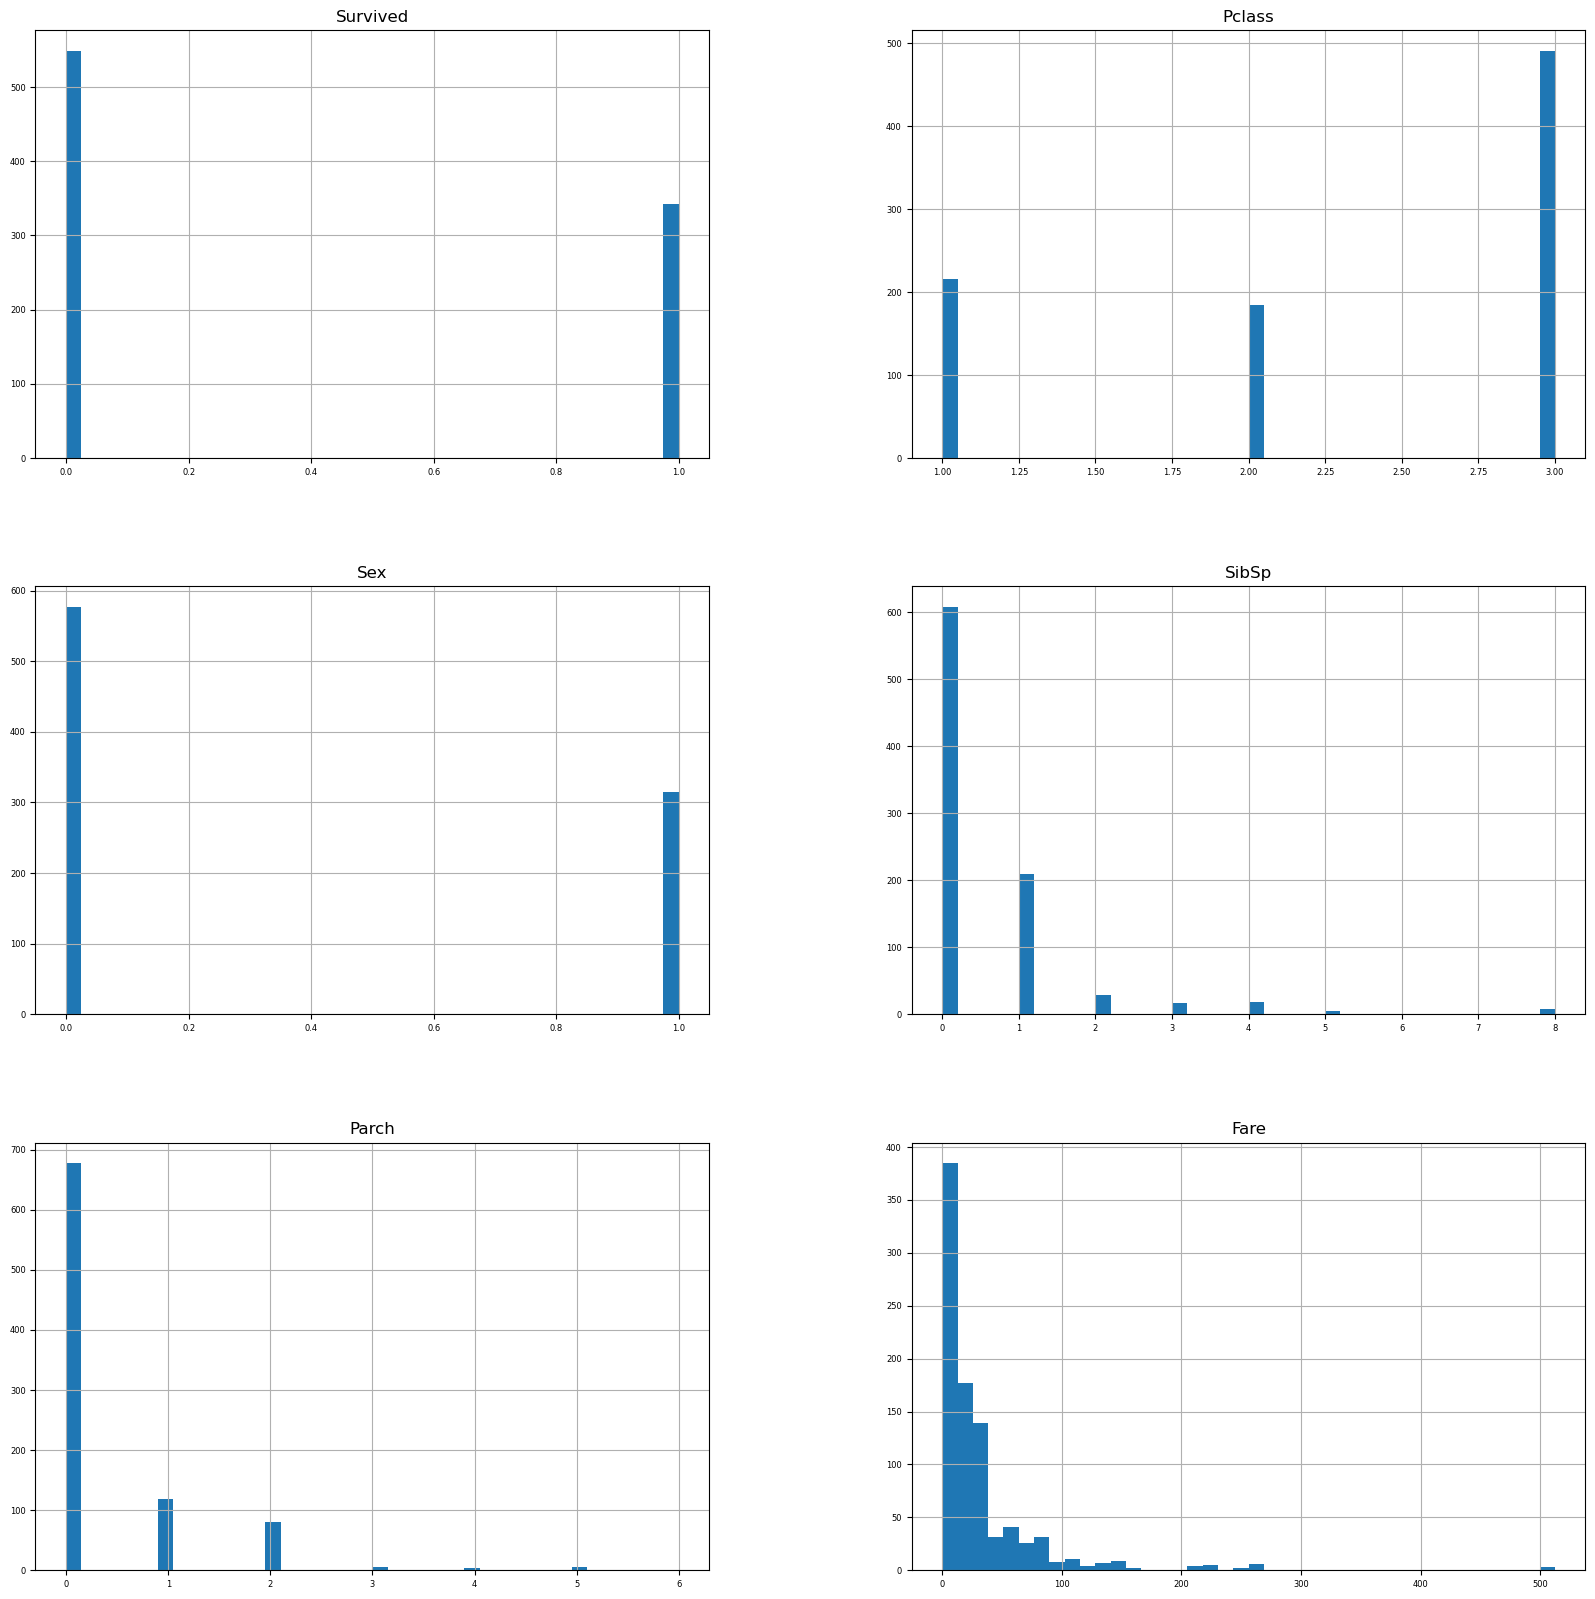

In [61]:
data.hist(figsize=(20,20),bins=40,xlabelsize=6,ylabelsize=6);

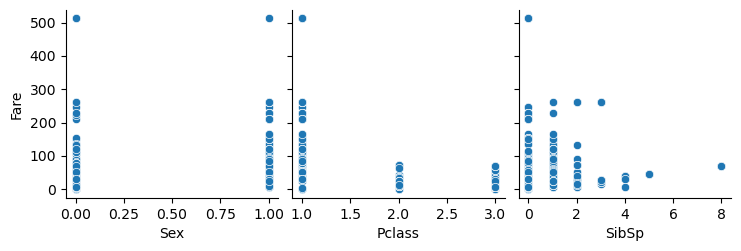

In [91]:
sns.pairplot(data,x_vars=['Sex','Pclass','SibSp'],y_vars='Fare',kind='scatter')
plt.show()

<Axes: ylabel='count'>

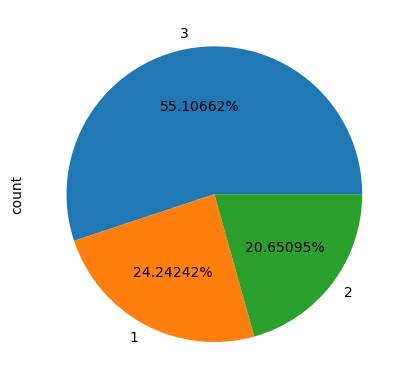

In [81]:
data['Pclass'].value_counts().head().plot(kind = 'pie',autopct = '%5.5f%%')

<Axes: ylabel='Frequency'>

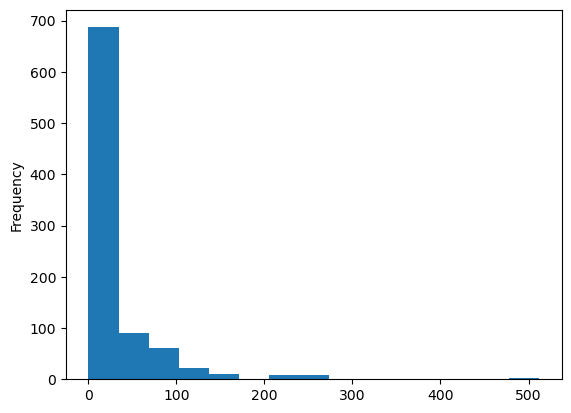

In [89]:
data['Fare'].plot.hist(bins=15)